In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [82]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/vmac', sep='  ')

/tmp/ipykernel_766401/1073689475.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/vmac', sep='  ')


In [109]:
rats = np.arange(5.3,8.3,0.1)
rats = np.repeat(rats, 3)
rats

array([5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.7,
       5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 6. , 6. , 6. , 6.1, 6.1,
       6.1, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5,
       6.6, 6.6, 6.6, 6.7, 6.7, 6.7, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 7. ,
       7. , 7. , 7.1, 7.1, 7.1, 7.2, 7.2, 7.2, 7.3, 7.3, 7.3, 7.4, 7.4,
       7.4, 7.5, 7.5, 7.5, 7.6, 7.6, 7.6, 7.7, 7.7, 7.7, 7.8, 7.8, 7.8,
       7.9, 7.9, 7.9, 8. , 8. , 8. , 8.1, 8.1, 8.1, 8.2, 8.2, 8.2, 8.3,
       8.3, 8.3])

In [110]:
len(rats)

93

In [111]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(Ca),A(O),A(Na),A(S),A(Fe),A(N),A(Mg),A(Si),oisorat
0,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
1,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
2,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.3
3,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.4
4,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.2
89,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.2
90,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.3
91,ASAS-RCB-21.txt,0.0,5750.0,1.0,0.0,7.0,7.5,11.5,9.85,5.87,9.0,5.29,6.16,7.5,9.113,6.55,6.59,8.3


In [112]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-2/fitlist_asas-rcb-21-comb-finer', sep=' ', index=False)

In [113]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-11-50-43_0.03363268036537814_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [114]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [115]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(0.0713896905032964)

In [116]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

In [118]:
rats

array([5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3])

6.85 -1.77 2.3


Text(0.5, 0, '16O/18O ratio')

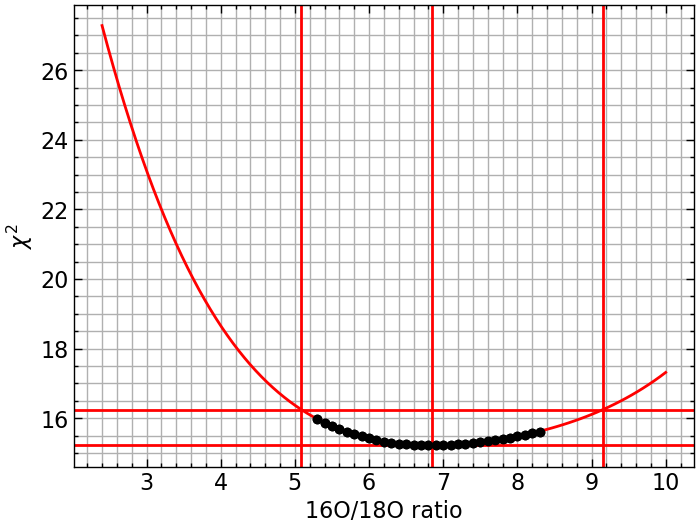

In [117]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(2.4,10,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


In [39]:
o16rats = rats/(1+rats)
o16s =  (8.77 + np.array(oabunds)) + np.log(o16rats)

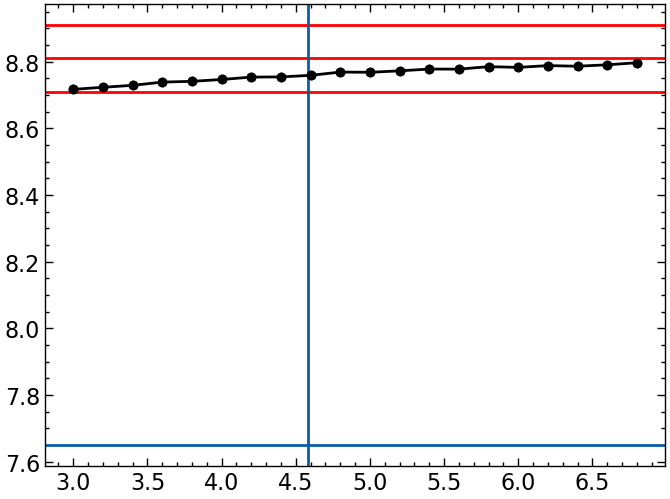

In [93]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
plt.axhline(8.77-1.12)
plt.axhline(8.81, color='r')
plt.axhline(8.81-0.1, color='r')
plt.axhline(8.81+0.1, color='r')
plt.axvline(4.58)

In [56]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-04-44-54_0.014775651587911276_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

5.85 0.58 -0.67


Text(0.5, 0, '16O/18O ratio')

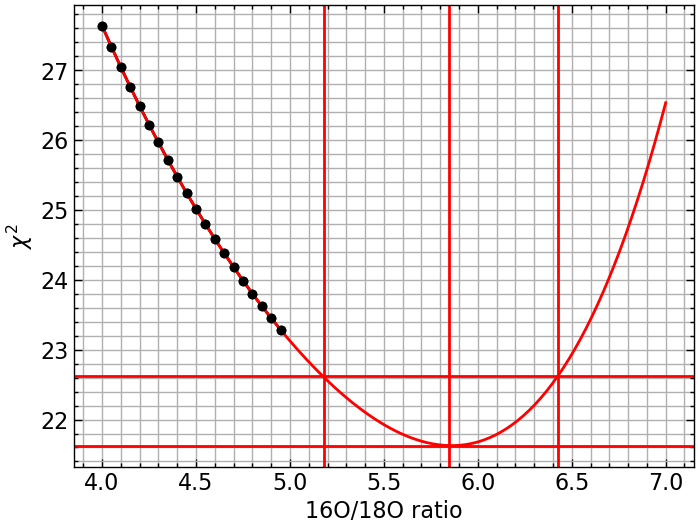

In [57]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(4,7,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds
